In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

In [2]:
# Treating Outliers

from statsmodels.graphics.regressionplots import influence_plot

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# LR Module
import statsmodels.formula.api as smf

# QQ Plot + Linearity in Parameter
import statsmodels.api as sm

### Importing the Data & Preprocessing the Data

In [5]:
start = pd.read_csv('50_Startups.csv')

In [6]:
start.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [7]:
start.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [8]:
start.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [9]:
# converting obj data type

startup = pd.get_dummies(start,columns=['State'])

In [10]:
startup.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [11]:
startup.rename(columns={'R&D Spend':'RnD','Marketing Spend':"Marketing",'State_California':'California','State_Florida':'Florida','State_New York':'NewYork'},inplace=True)

In [12]:
startup.head()

,RnD,Administration,Marketing,Profit,California,Florida,NewYork
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [13]:
startup[startup.duplicated()].shape

(0, 7)

## Creating the Model

In [14]:
startup.corr()

,RnD,Administration,Marketing,Profit,California,Florida,NewYork
RnD,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
Marketing,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
NewYork,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


<AxesSubplot:>

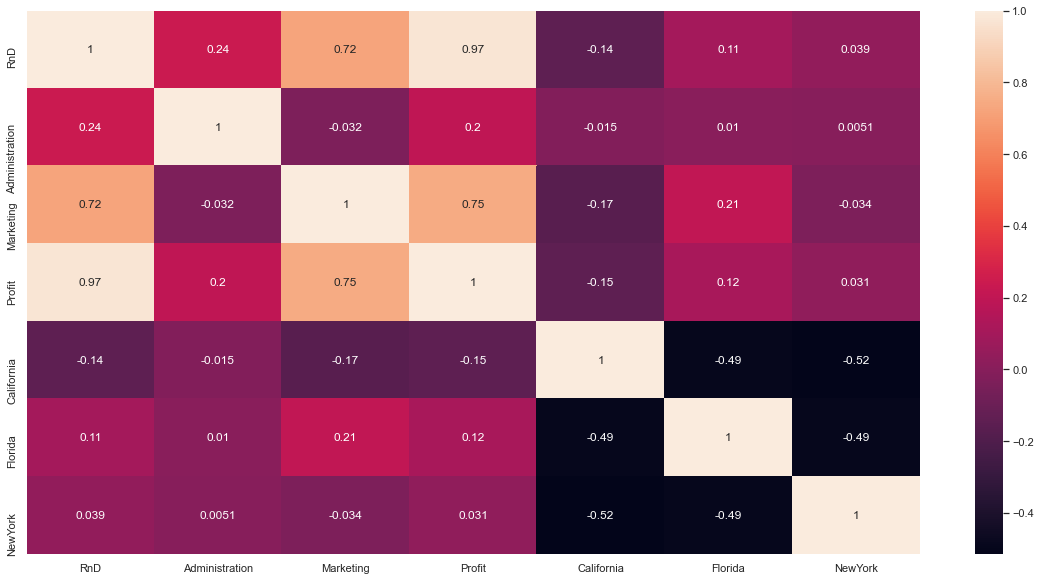

In [15]:
plt.figure(figsize=(20,10))
sns.heatmap(startup.corr(),annot=True)

In [16]:
model = smf.ols('Profit~RnD+Administration+Marketing+California+Florida+NewYork',data=startup).fit()

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Fri, 03 Dec 2021   Prob (F-statistic):           1.34e-27
Time:                        13:45:03   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3.763e+04   5073.636      7.417      0.000    2.74e+04    4.79e+04
RnD                0.8060      0.046     17.369      0.000       0.712       0.900
Administration    -0.0270      0.052     -0.517      0.608      -0.132       0.078
Marketing          0.0270      0.017      1.574      0.123      -0.008       0.062
California      1.249e+04   2449.797      5.099      0.000    7554.868    1.74e+04
Florida         1.269e+04   2726.700      4.654      0.000    7195.596    1.82e+04
NewYork         1.245e+04   2486.364      5.007      0.000    7439.285    1.75e+04
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     3.31e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.55e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [18]:
# p value for Administration & Marketing_Spend is against our assumption
# creating individual model 

model_a = smf.ols('Profit~Administration',data=startup).fit()
model_a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Fri, 03 Dec 2021   Prob (F-statistic):              0.162
Time:                        13:45:08   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# pvalue is high for administration

In [19]:
model_m = smf.ols('Profit~Marketing',data=startup).fit()
model_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Fri, 03 Dec 2021   Prob (F-statistic):           4.38e-10
Time:                        13:45:12   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
Marketing      0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
model_am = smf.ols('Profit~Administration+Marketing',data=startup).fit()
model_am.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Fri, 03 Dec 2021   Prob (F-statistic):           2.50e-10
Time:                        13:45:15   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
Administration     0.3237      0.131      2.468      0.017       0.060       0.588
Marketing          0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#while together p values are less

### Collinearity 

In [ ]:
# to understand the collinearity of variables cal vif -Profit~RnD+Administration+Marketing+California+Florida+NewYork

In [21]:
r_rd = smf.ols('RnD~Administration+Marketing+California+Florida+NewYork',data=startup).fit().rsquared
vif_rd = 1/(1-r_rd)

r_ad = smf.ols('Administration~RnD+Marketing+California+Florida+NewYork',data=startup).fit().rsquared
vif_ad = 1/(1-r_ad)

r_m = smf.ols('Marketing~RnD+Administration+California+Florida+NewYork',data=startup).fit().rsquared
vif_m = 1/(1-r_m)

r_c = smf.ols('California~RnD+Administration+Marketing+Florida+NewYork',data=startup).fit().rsquared
vif_c = 1/(1-r_c)

r_f = smf.ols('Florida~RnD+Administration+Marketing+California+NewYork',data=startup).fit().rsquared
vif_f = 1/(1-r_f)

r_n = smf.ols('NewYork~RnD+Administration+Marketing+California+Florida',data=startup).fit().rsquared
vif_n = 1/(1-r_n)

vif_df =pd.DataFrame({'Variables':['RnD','Administration','Marketing','California','Florida','NewYork'],'VIF':[vif_rd,vif_ad,vif_m,vif_c,vif_f,vif_n]})
vif_df

,Variables,VIF
0,RnD,2.495511
1,Administration,1.177766
2,Marketing,2.416797
3,California,inf
4,Florida,inf
5,NewYork,inf


In [ ]:
# since VIF <20, no collinearity, taking all the variables for predicting Price

## Residual Analysis

Text(0.5, 1.0, ' QQ Plot For checking Normality of Residual')

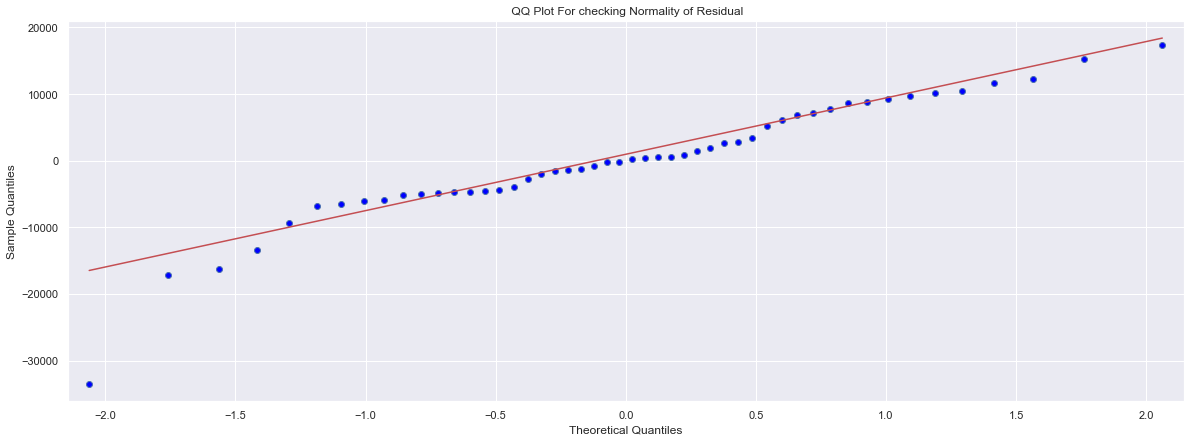

In [22]:
fig,ax = plt.subplots(figsize=(20,7))

qqplots = sm.qqplot(model.resid,line='q',ax=ax)
plt.title(' QQ Plot For checking Normality of Residual')

In [23]:
list(np.where(model.resid<-30000))

[array([49], dtype=int64)]

In [24]:
# Test for Homoscedasticity or Heteroscedasticity - resid vs predicted/fitted value

def std_val(values):
    return (values-values.mean())/values.std()

Text(0.5, 1.0, 'Checking for Homoscedasticity')

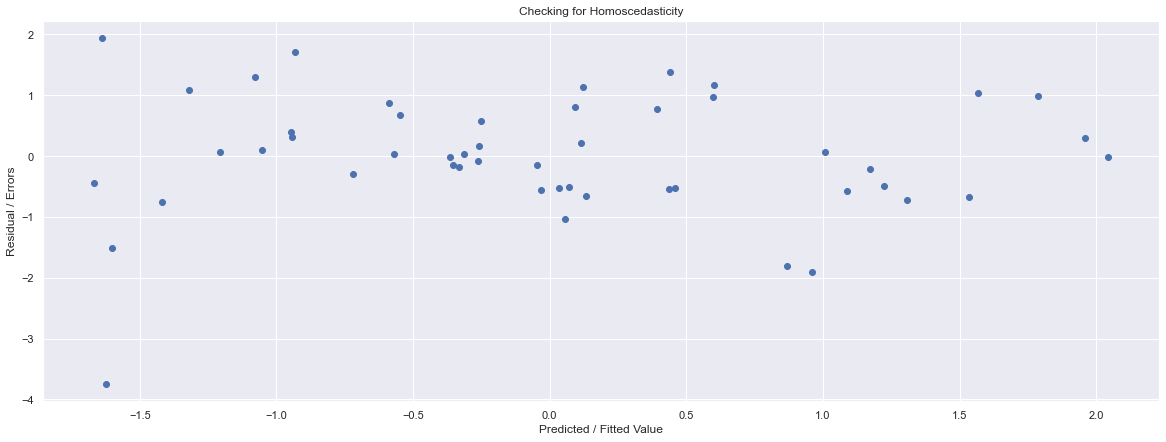

In [25]:
plt.figure(figsize=(20,7))
plt.scatter(std_val(model.fittedvalues),std_val(model.resid))
plt.xlabel('Predicted / Fitted Value')
plt.ylabel('Residual / Errors')
plt.title('Checking for Homoscedasticity')

### Residual vs Regressor

In [ ]:
# Profit~RnD+Administration+Marketing+California+Florida+NewYork

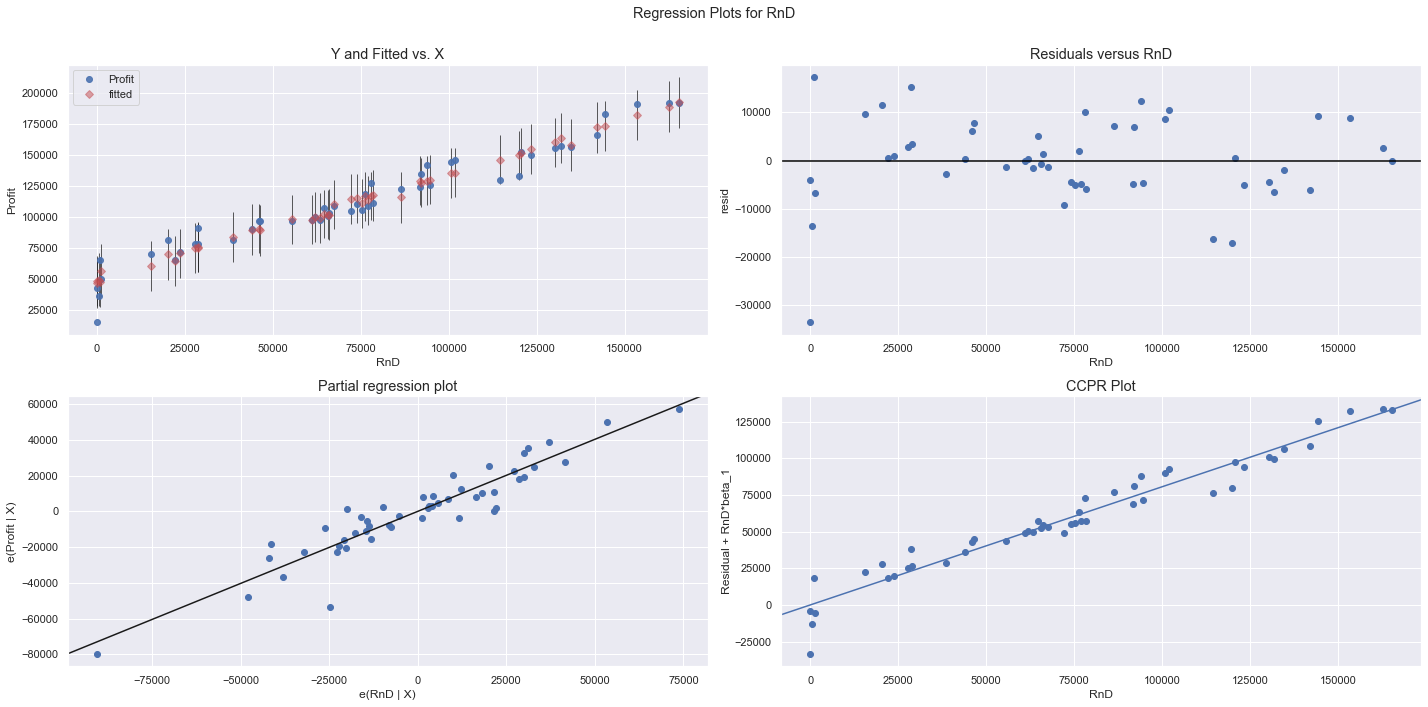

In [27]:
sm.graphics.plot_regress_exog(model,'RnD',fig=plt.figure(figsize=(20,10)))
plt.show()

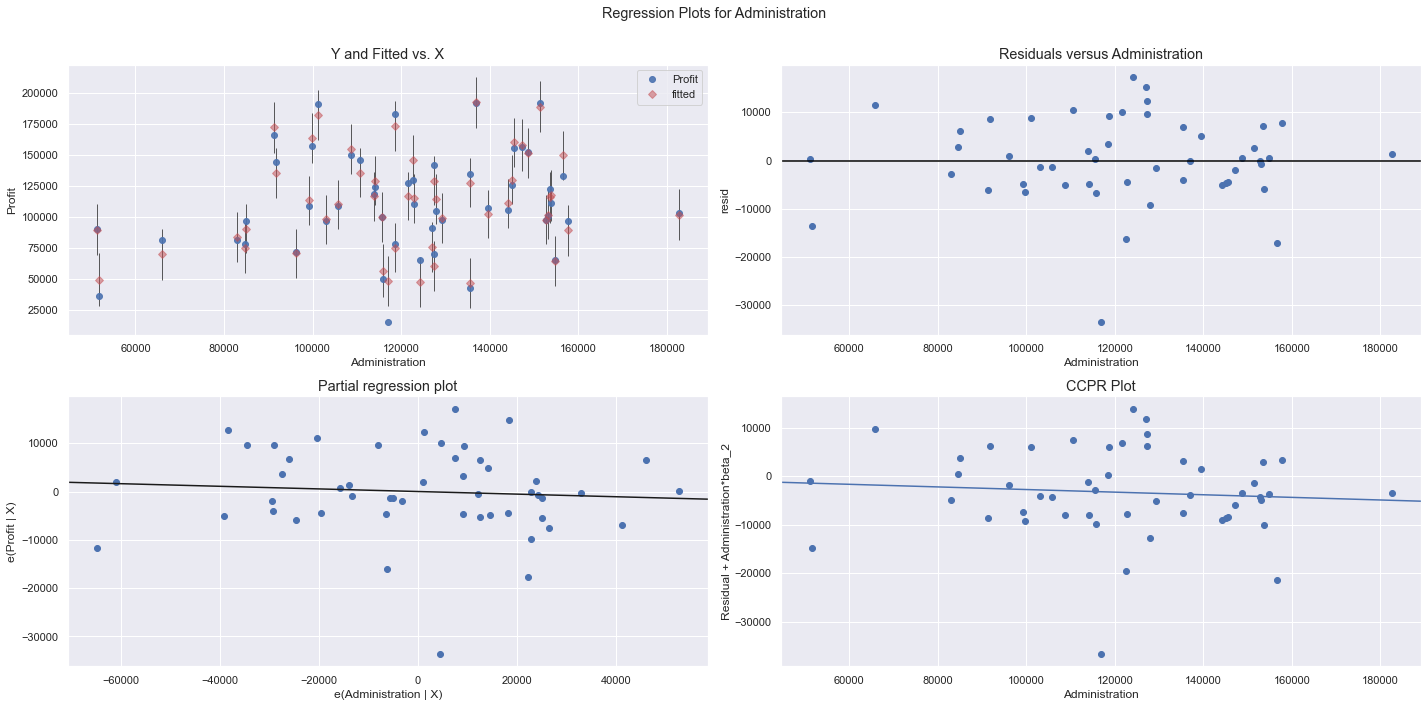

In [28]:
sm.graphics.plot_regress_exog(model,'Administration',fig=plt.figure(figsize=(20,10)))
plt.show()

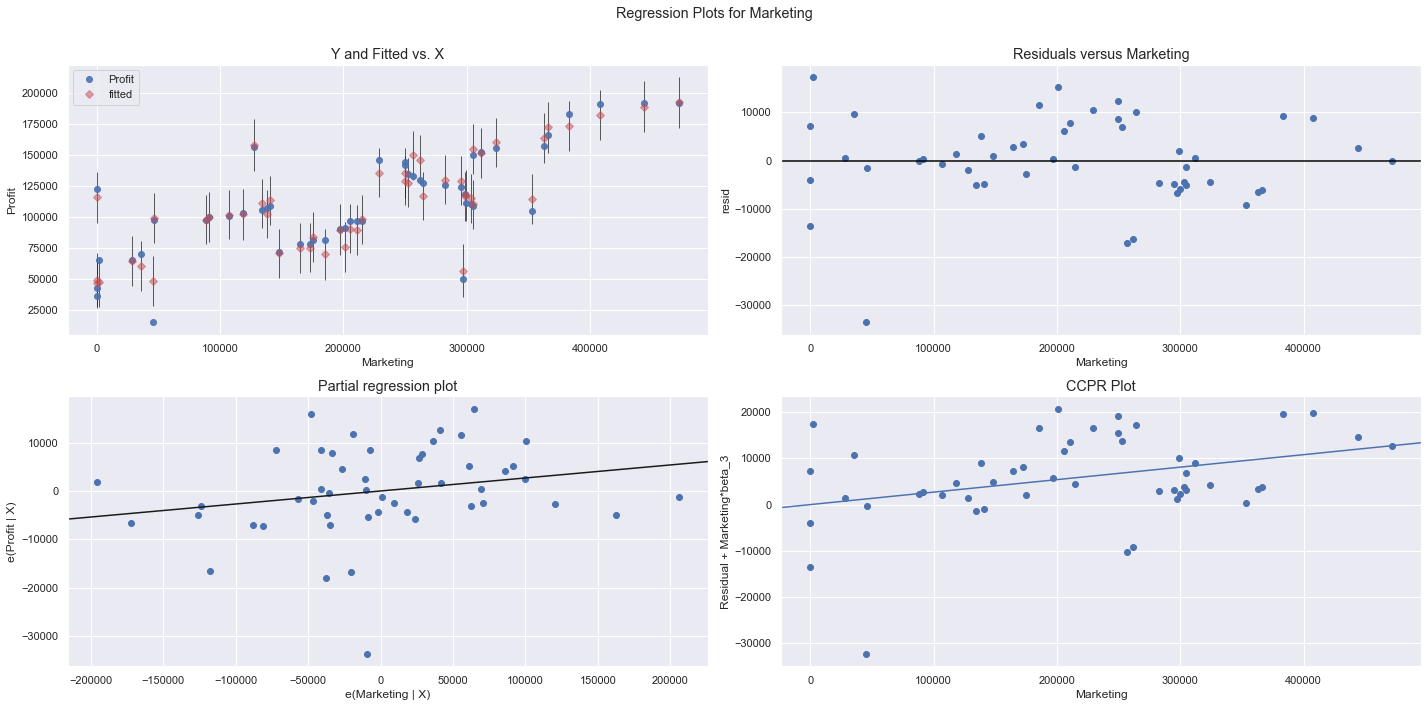

In [29]:
sm.graphics.plot_regress_exog(model,'Marketing',fig=plt.figure(figsize=(20,10)))
plt.show()

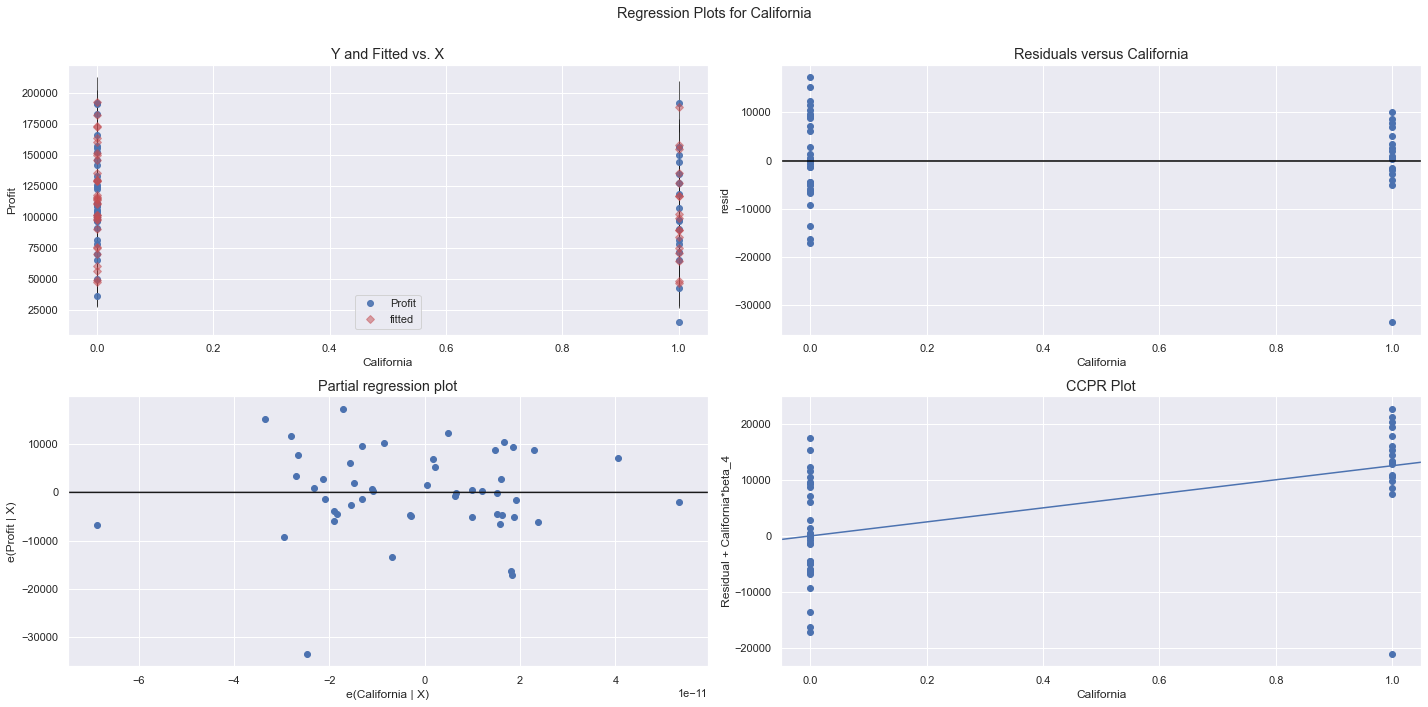

In [30]:
sm.graphics.plot_regress_exog(model,'California',fig=plt.figure(figsize=(20,10)))
plt.show()

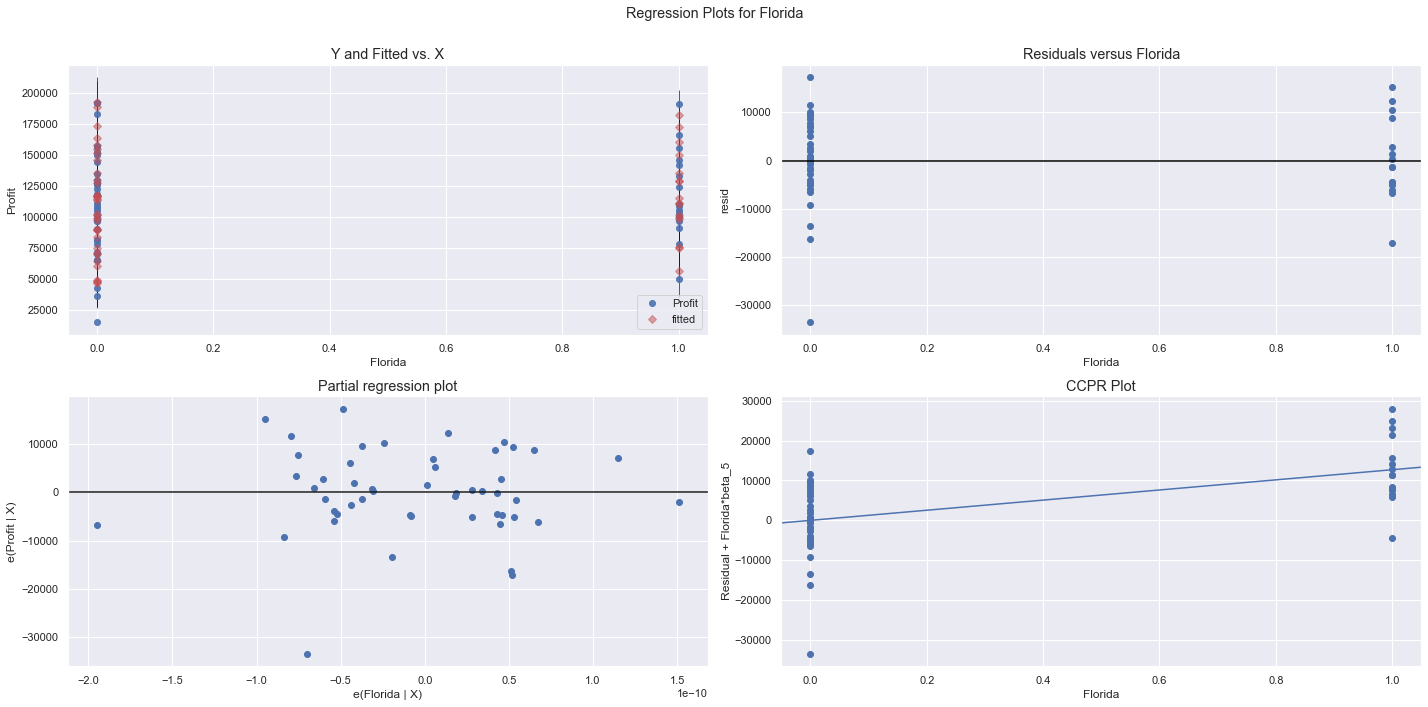

In [31]:
sm.graphics.plot_regress_exog(model,'Florida',fig=plt.figure(figsize=(20,10)))
plt.show()

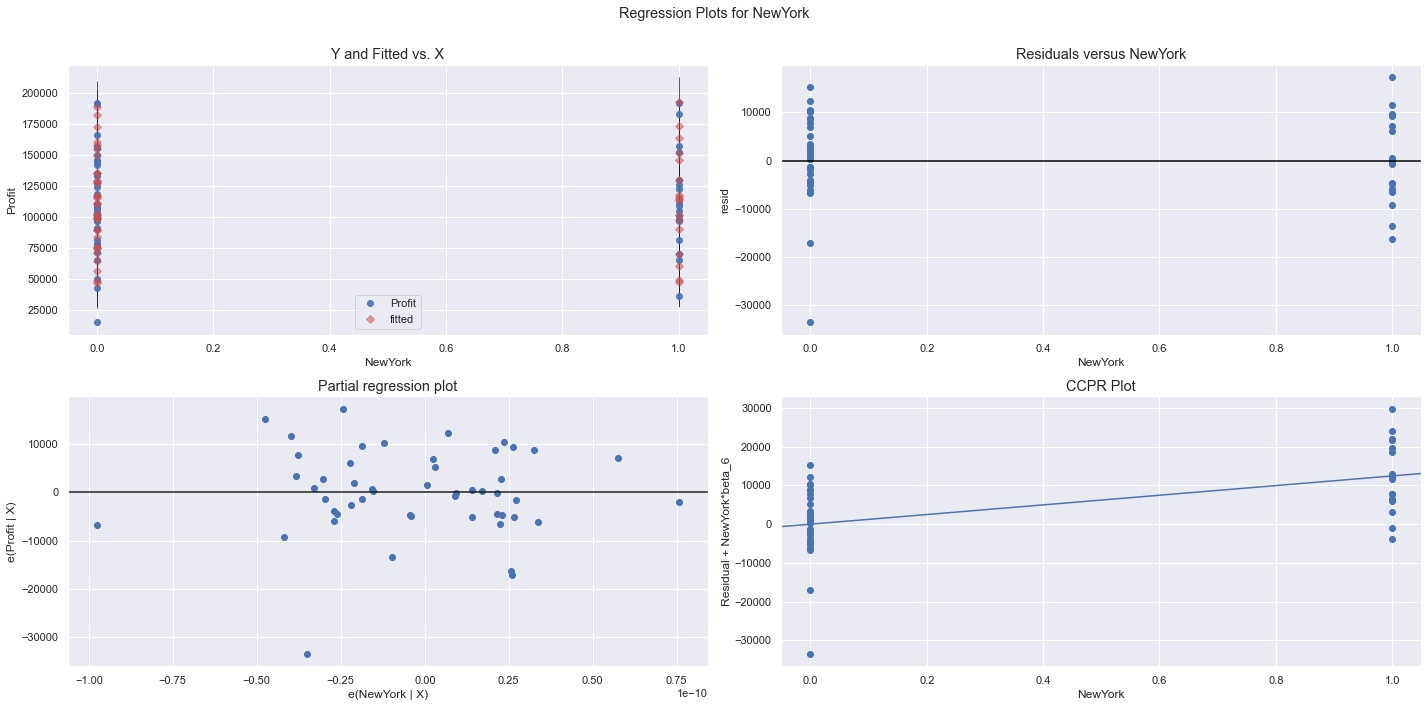

In [32]:
sm.graphics.plot_regress_exog(model,'NewYork',fig=plt.figure(figsize=(20,10)))
plt.show()

### Out lier Detection

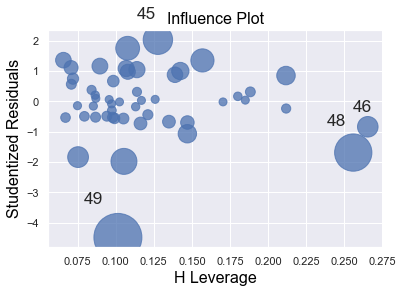

In [33]:
influence_plot(model)
plt.show()

In [34]:
(c,_)=model.get_influence().cooks_distance
np.argmax(c),np.max(c)

(49, 0.2262509450150931)

Text(0, 0.5, 'Cooks Distance')

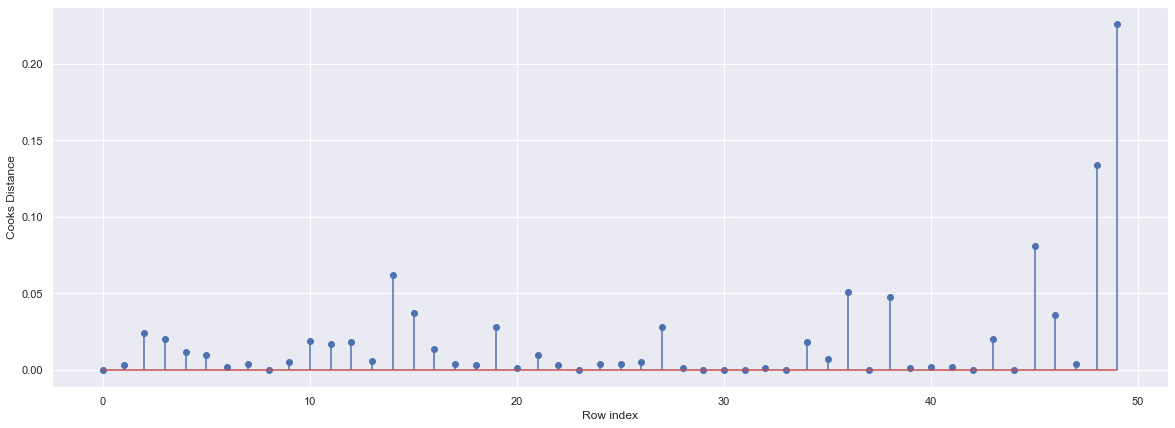

In [35]:
plt.figure(figsize=(20,7))
plt.stem(np.arange(len(startup)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')

In [36]:
while np.max(c>0.1):
    startup = startup.drop(startup.index[np.argmax(c)],axis = 0).reset_index(drop=True)
    model_final = smf.ols('Profit~RnD+Administration+Marketing+California+Florida+NewYork',data=startup).fit()
    # new influencing points
    (c,_) = model_final.get_influence().cooks_distance
    
else:
    model_final = smf.ols('Profit~RnD+Administration+Marketing+California+Florida+NewYork',data=startup).fit()
    print(f'R Squared is :{model_final.rsquared}')
    print(f'aic value is :\n {model_final.aic}')

R Squared is :0.9628371102993712
aic value is :
 998.4621953724801


In [37]:
model_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     217.6
Date:                Fri, 03 Dec 2021   Prob (F-statistic):           7.02e-29
Time:                        13:47:45   Log-Likelihood:                -493.23
No. Observations:                  48   AIC:                             998.5
Df Residuals:                      42   BIC:                             1010.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4.409e+04   4569.825      9.648      0.000    3.49e+04    5.33e+04
RnD                0.7888      0.037     21.160      0.000       0.714       0.864
Administration    -0.0621      0.045     -1.381      0.174      -0.153       0.029
Marketing          0.0179      0.014      1.275      0.209      -0.010       0.046
California       1.53e+04   2035.915      7.516      0.000    1.12e+04    1.94e+04
Florida         1.415e+04   2261.128      6.259      0.000    9588.163    1.87e+04
NewYork         1.464e+04   2223.793      6.581      0.000    1.01e+04    1.91e+04
==============================================================================
Omnibus:                        0.267   Durbin-Watson:                   1.835
Prob(Omnibus):                  0.875   Jarque-Bera (JB):                0.453
Skew:                           0.108   Prob(JB):                        0.797
Kurtosis:                       2.576   Cond. No.                     1.27e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.4e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
# still p values are high

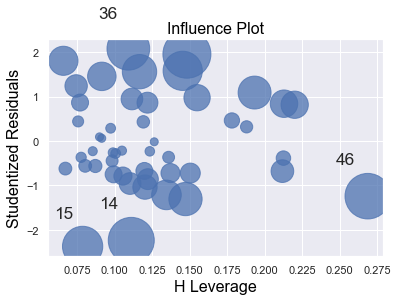

In [38]:
influence_plot(model_final)
plt.show()

In [39]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of rows
k=startup.shape[1]
n=startup.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.5

### Table Containing R^2 Value For Each Prepared Model

In [40]:
m = pd.DataFrame({'Model':['model','model_final'],'R_Squared':[model.rsquared,model_final.rsquared]})
m

,Model,R_Squared
0,model,0.950752
1,model_final,0.962837
